# HLA-A allele clustering

## Section 1: Setup

In [1]:
from gentype import EnsemblClient, DataManager, PiCollapsedNonparametricGibbsSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

Set up Classes:

In [2]:
Database_Name = "Gentype_DB.db"
client = EnsemblClient()
data_manager = DataManager(client, Database_Name)

Initialize storable data:

In [ ]:
fetched = False
inference_matrix = None
models = None

Restore stored data:

In [ ]:
#%store -d fetched # if you want to refetch the data, uncomment this line
#%store -d inference_matrix # if you want to recompute the inference_matrix, uncomment this line
#%store -d models # if you want to recompute the models, uncomment this line
%store -r

## Section 2: Collecting and preparing data

Fetches all HLA-A data obtained in 1000 Genomes project phase3 and stores them in a local sqlite server. This only needs to be done once but might take a while.

In [3]:
if not fetched:
    data_manager.fetch_all(29941260, 29945884, "6", report_progress = True)
fetched = True
%store fetched

Stored 'fetched' (bool)


The following generates an inference matrix from the data provided by the local database. The inference matrix can be constructed with respect to a population and a section specified by start and end. Be sure to fetch the according population before constructing the matrix. If _sum_allels = True_ is passed, the expression for an individual per allele will be summed (if expressed on both -> 2, on one -> 1, on neither -> 0). Otherwise each strand will be represented by a seperate row.

In [4]:
if inference_matrix is None:
    inference_matrix, individual_map, variation_map = data_manager.generate_inference_matrix(start = 29941260, end = 29945884, population = "ALL")
%store inference_matrix, individual_map, variation_map
inference_matrix.shape

[[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. ... 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. ... 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
  0. 0. 0

Mean number of variations per allele, for HLA-A as expected high.

In [5]:
inference_matrix.sum(axis=1).mean()

91.09704472843451

## Section 3: Training the Model

Train models with different initializations without seeding.

Here we compute different models with varying dirichlet prior alpha. This prior is proportional to the probability of creating a new cluster, therefore inference with high alphas tends to begin with a higher number of clusters. This might take a while.

Model 0:
Iteration: 1; Current clusters: 9; Likelihood: -2236441.002
Iteration: 2; Current clusters: 9; Likelihood: -2210642.902
Iteration: 3; Current clusters: 9; Likelihood: -2210009.361
Iteration: 4; Current clusters: 9; Likelihood: -2210060.054
Iteration: 5; Current clusters: 9; Likelihood: -2210123.695
Iteration: 6; Current clusters: 9; Likelihood: -2210161.193
Iteration: 7; Current clusters: 8; Likelihood: -2210218.005
Iteration: 8; Current clusters: 8; Likelihood: -2210115.909
Iteration: 9; Current clusters: 8; Likelihood: -2210145.125
Iteration: 10; Current clusters: 8; Likelihood: -2210225.270
Iteration: 11; Current clusters: 8; Likelihood: -2210249.364
Iteration: 12; Current clusters: 8; Likelihood: -2210116.843
Iteration: 13; Current clusters: 8; Likelihood: -2210059.054
Iteration: 14; Current clusters: 8; Likelihood: -2210190.966
Iteration: 15; Current clusters: 8; Likelihood: -2210180.922
Iteration: 16; Current clusters: 8; Likelihood: -2210184.016
Iteration: 17; Current c

Iteration: 135; Current clusters: 8; Likelihood: -2210093.715
Iteration: 136; Current clusters: 8; Likelihood: -2210111.997
Model 1:
Iteration: 1; Current clusters: 12; Likelihood: -2209269.003
Iteration: 2; Current clusters: 10; Likelihood: -2193667.797
Iteration: 3; Current clusters: 12; Likelihood: -2191401.282
Iteration: 4; Current clusters: 9; Likelihood: -2191449.075
Iteration: 5; Current clusters: 9; Likelihood: -2191265.314
Iteration: 6; Current clusters: 8; Likelihood: -2191262.673
Iteration: 7; Current clusters: 8; Likelihood: -2191067.060
Iteration: 8; Current clusters: 8; Likelihood: -2191069.221
Iteration: 9; Current clusters: 8; Likelihood: -2190980.986
Iteration: 10; Current clusters: 8; Likelihood: -2191045.258
Iteration: 11; Current clusters: 8; Likelihood: -2191043.860
Iteration: 12; Current clusters: 8; Likelihood: -2191003.329
Iteration: 13; Current clusters: 8; Likelihood: -2191033.657
Iteration: 14; Current clusters: 8; Likelihood: -2191014.062
Iteration: 15; Curr

Iteration: 13; Current clusters: 13; Likelihood: -2203638.638
Iteration: 14; Current clusters: 13; Likelihood: -2203646.603
Iteration: 15; Current clusters: 10; Likelihood: -2203660.781
Iteration: 16; Current clusters: 11; Likelihood: -2203664.434
Iteration: 17; Current clusters: 11; Likelihood: -2203672.726
Iteration: 18; Current clusters: 9; Likelihood: -2203635.202
Iteration: 19; Current clusters: 9; Likelihood: -2203727.837
Iteration: 20; Current clusters: 9; Likelihood: -2203720.700
Iteration: 21; Current clusters: 8; Likelihood: -2203699.231
Iteration: 22; Current clusters: 9; Likelihood: -2203324.042
Iteration: 23; Current clusters: 11; Likelihood: -2202595.178
Iteration: 24; Current clusters: 10; Likelihood: -2200375.819
Iteration: 25; Current clusters: 11; Likelihood: -2198532.030
Iteration: 26; Current clusters: 10; Likelihood: -2198418.955
Iteration: 27; Current clusters: 10; Likelihood: -2198311.733
Iteration: 28; Current clusters: 9; Likelihood: -2198263.393
Iteration: 29;

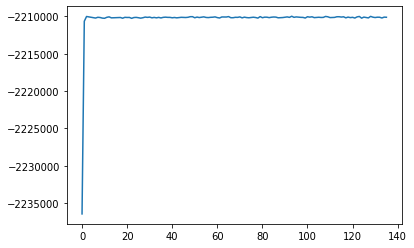

Model 1:


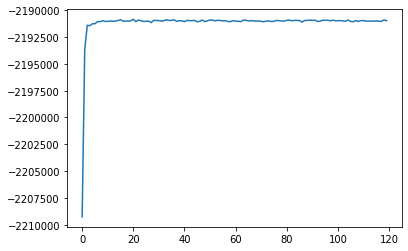

Model 2:


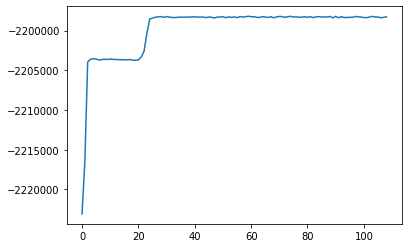

Stored 'models' (list)


In [6]:
if models is None:
    models = [PiCollapsedNonparametricGibbsSampler(42), PiCollapsedNonparametricGibbsSampler(42), PiCollapsedNonparametricGibbsSampler(42)]
    for i in range(0, len(models)):
        print("Model {}:".format(i))
        models[i].fit(inference_matrix, num_burn_in_steps = 100, delta = 1, alpha = 10**(i - 1))
for i in range(0, len(models)):
    print("Model {}:".format(i))
    plt.clf()
    plt.plot(models[i].ll_list)
    plt.show()

%store models

May pre select models e.g. according to Aitikens Information Criterion (AIC)

In [7]:
def AIC(model):
    size = np.prod(np.shape(model.theta))
    loglikelihood =model.ll_list[-1]
    return 2*size - 2*loglikelihood

print(list(map(lambda x: AIC(x), models)))

[4427231.994350754, 4388971.136453764, 4406137.6607049545]


## Section 4: Model analysis

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(inference_matrix)
pca.explained_variance_ratio_.cumsum()

array([0.34239843, 0.53971578])

Over 50% of the variation can be explained by the first two principle components !!!

In [9]:
inds = list(individual_map.keys())
inds.extend(list(individual_map.keys()))

populations = ["AFR", "AMR", "EAS", "EUR", "SAS"]
ind_map = data_manager.generate_individual_population_map()
population_index = []
for ind in inds:
    for pop in ind_map[ind]:
        if pop in populations:
            population_index.append(populations.index(pop))
pops = np.array(population_index)

Population distribution...

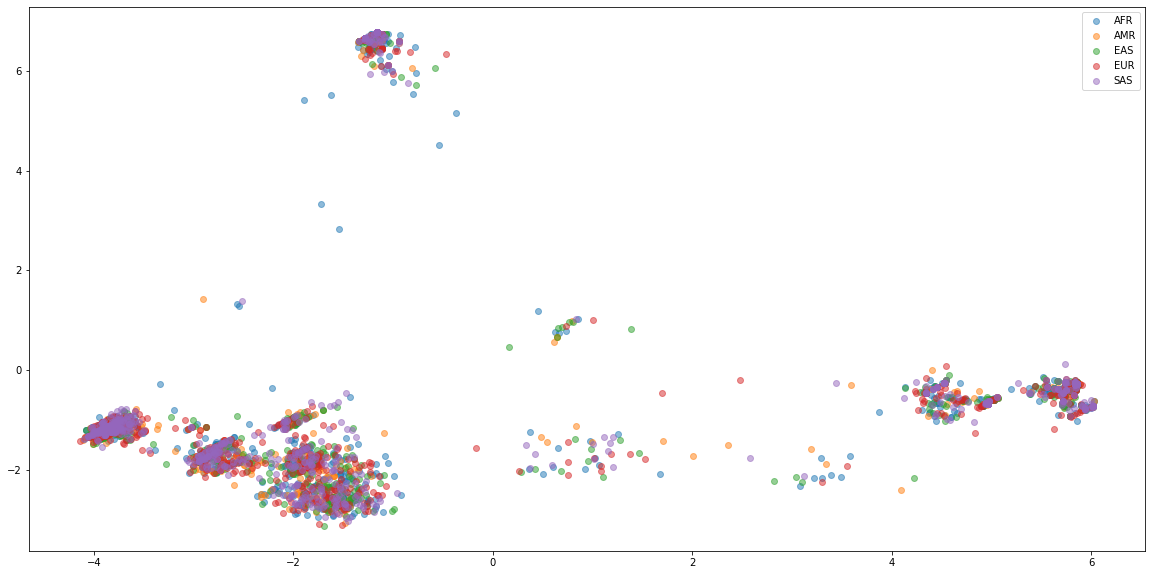

In [10]:
fig, ax = plt.subplots(figsize = (20,10))

for i in range(len(pops)):
    ax.plot(principalComponents[pops == i,0], principalComponents[pops == i,1], "o", alpha=0.5)
ax.legend(populations)

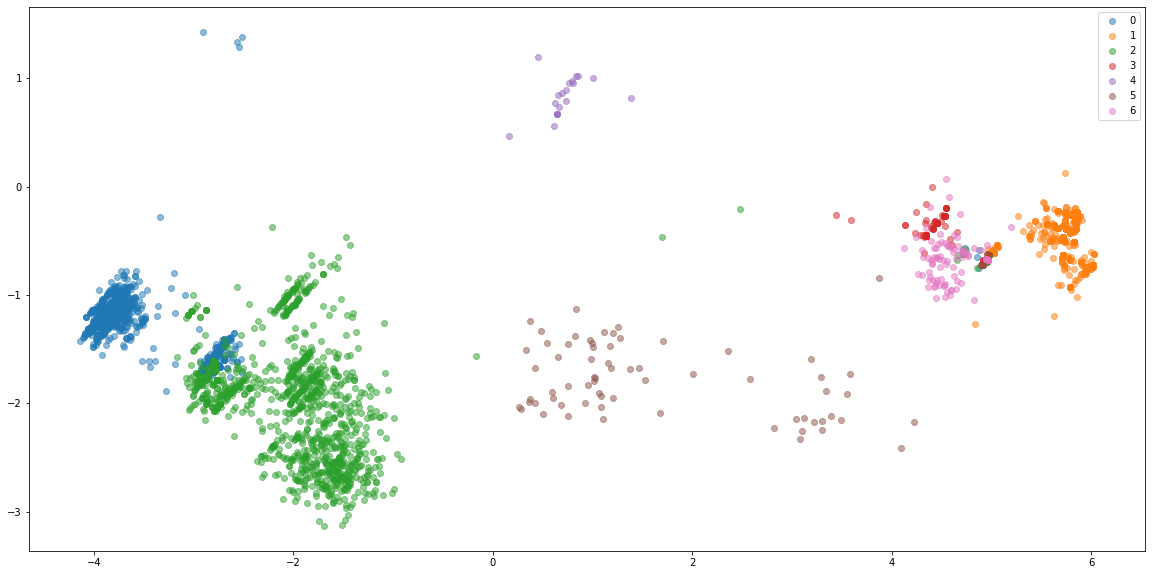

In [14]:
fig, ax = plt.subplots(figsize = (20,10))

for i in range(int(max(models[0].Z))):
    ax.plot(principalComponents[models[0].Z == i,0], principalComponents[models[0].Z == i,1], "o", alpha=0.5)
ax.legend(range(int(max(models[0].Z))))

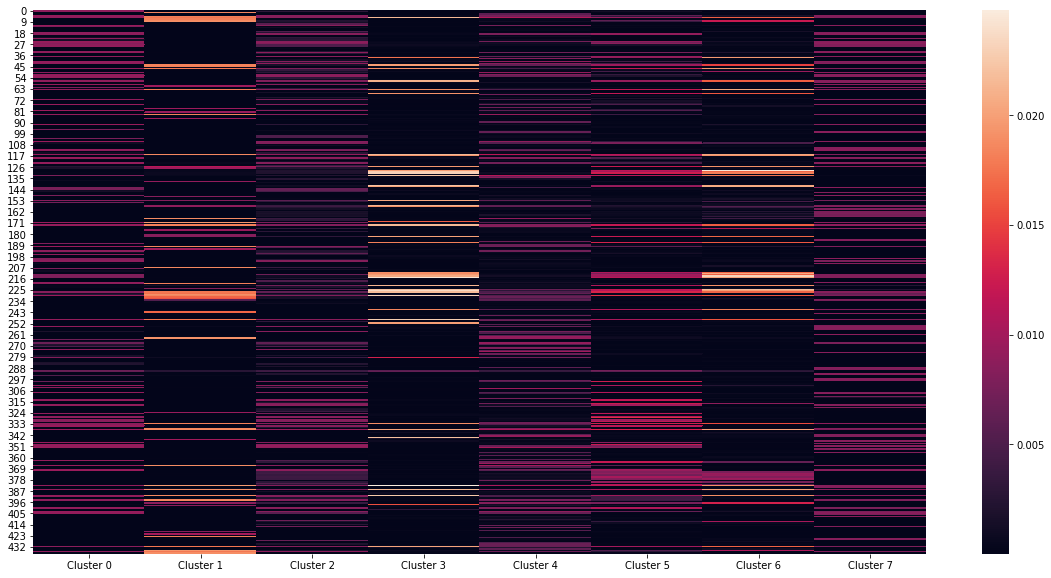

In [16]:
df = pd.DataFrame(dict(zip(["Cluster " + str(i) for i in range(len(models[0].theta))], list(models[0].theta))))
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df)

The following generates the distribution (as a dict) of amount of variations per strand in the specified region. I.e. {n : #strands with n variations}. And chooses one of the amounts according to the distribution.

In [ ]:
distribution = data_manager.get_variation_distribution(start = 17671934, end = 17681934, population = "CHB")
choices = []
probabilities = []
for choice in distribution:
    choices.append(choice)
    probabilities.append(distribution[choice])
choices = np.array(choices)
probabilities = np.array(probabilities) / sum(probabilities)
print("Choices: {}".format(choices))
print("Probabilities: {}".format(probabilities))
np.random.choice(choices, p=probabilities)